In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "PI", # values: MT, PA, MS, PI
	"training_date": "earlier", # values: earlier, current
	"mode": "ensemble", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": False,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = PIMultipleDates
else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 7
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 5; repetition_id = 0		

	elif type(dataset) == PIMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 7; repetition_id = 0		

else:

	exp = 7
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': False, 'inferring': True, 'site': 'MS', 'training_date': 'earlier', 'mode': 'ensemble', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': False, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'inference_times': 10, 'training_times': 10}


ic| dataset.py:392 in __init__()- list(self.date_ids): [0]
ic| dataset.py:413 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 9
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]


In [8]:
dates

[2019, 2020]

In [9]:
manager.config

{'training': False,
 'inferring': True,
 'site': 'MS',
 'training_date': 'earlier',
 'mode': 'ensemble',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': False,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'inference_times': 10,
 'training_times': 10,
 'dropout_training': False}

In [10]:
exp

5

In [11]:
manager.setExperimentPath()
manager.createLogFolders()

In [12]:
# ic(type(dataset), exp, dataset.dates)


In [13]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/MS/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:501 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| dataset.py:504 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MS/deforestation_before_2000_MS.tif


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([126708038, 235735967], dtype=int64))
ic| dataset.py:514 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))
ic| dataset.py:493 in loadLabel()
    label_per_date.shape: (18605, 19481, 1)


Removing bufer................
Mask label shape:  
 (18605, 19481, 1) 
 Unique values:  
 [0 1 2]


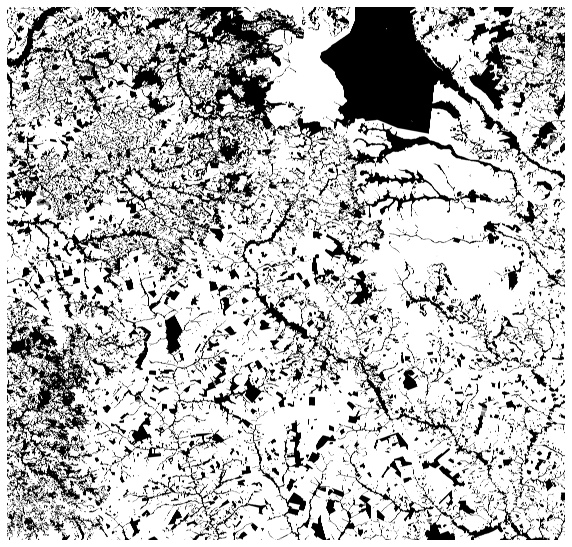

In [14]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [15]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3721 3896
Mask size:  (18605, 19480)


In [16]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [17]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([4870897,  107548, 9518571], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([5863739,   42735, 8590542], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([5043217,     380, 9453419], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([11586786,      524,  2909706], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([5102453,    8953, 9385610], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([ 4079965,    73003, 10344048], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([4678683,   19973, 9798360], dtype=int64))
Set 8 (array([0, 1, 2], dtype=uint8), array([ 3810754,    20163, 10666099], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([ 4360787,     7117, 10129112], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([ 2962032,    40216, 11494768], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([ 3461781,    13658, 11021577], dtype=int64))
Set 12 (array([0, 1, 2]

In [18]:

manager.label_mask.dtype

dtype('uint8')

In [19]:

manager.getLabelCurrentDeforestation()

In [20]:

manager.loadInputImage()

ic| dataset.py:441 in loadInputImage()
    image_stack.shape: (18605, 19481, 9)


Image shape:  (18605, 19481, 9)
mask:  (18605, 19480)
image stack:  (18605, 19480, 9)
ref : (18605, 19480, 1)


In [21]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.05263158, 0.10526316, 0.15789473, 0.21052632,
        0.2631579 , 0.31578946, 0.36842105, 0.42105263, 0.5263158 ,
        0.6315789 , 0.7368421 , 0.84210527, 0.94736844, 1.        ],
       dtype=float32),
 array([ 99662188,    560438,    316161,    440417,    310884,    701575,
           318766,    903906,   1003651,   1305903,   2096238,   3824633,
          6540581,   8716969, 235723090], dtype=int64))

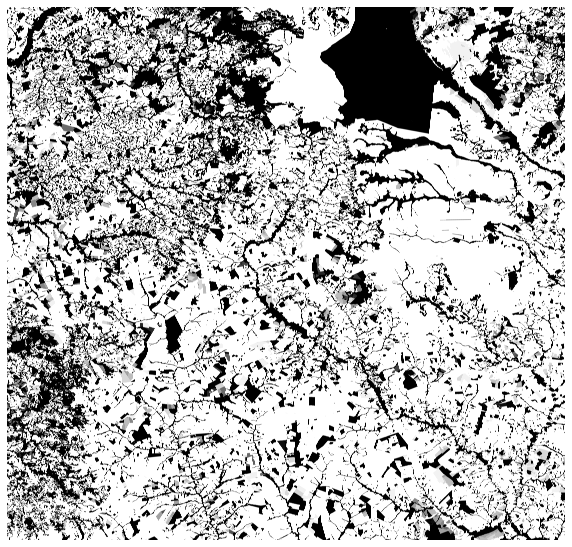

In [22]:

manager.logger.plotFigure(manager.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

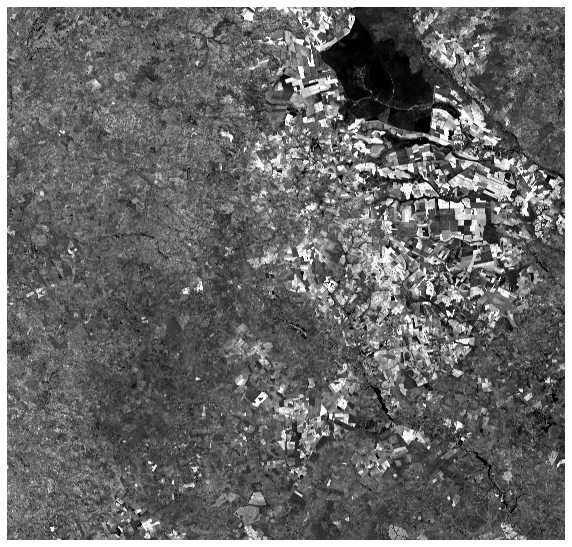

In [23]:

manager.logger.plotFigure(manager.image_stack[...,8], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [24]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([ 99008239,    506597, 262910564], dtype=int64))

In [25]:
# manager.maskNoDataAsNotConsideredClass()

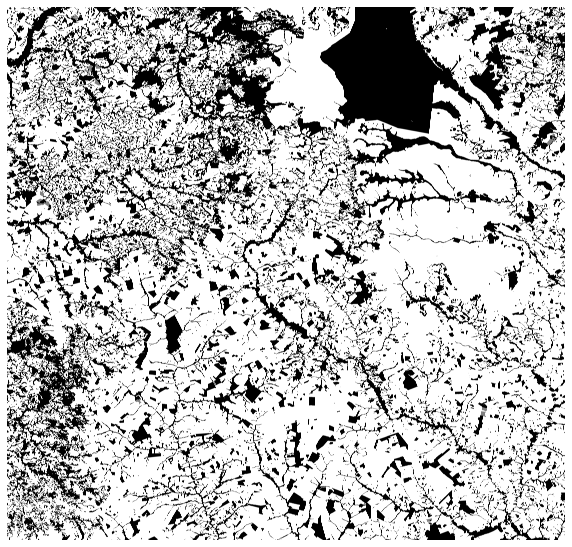

In [26]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [27]:

manager.getImageChannels()

ic| base.py:111 in getImageChannels()
    self.image_stack.shape: (18605, 19480, 9)
ic| base.py:113 in getImageChannels()- self.channels: 9


In [28]:

manager.getTrainValTestMasks()

Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]


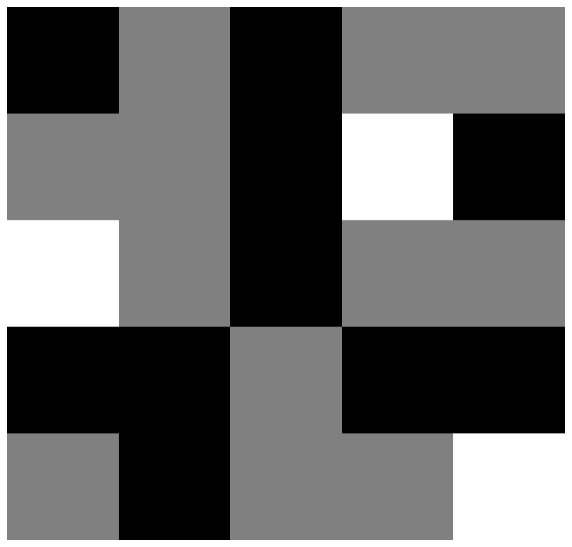

In [29]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [30]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [31]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([ 51670884,    190363, 122102945], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([10755724,    20775, 32714549], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([ 36581631,    295459, 108093070], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([ 99008239,    506597, 262910564], dtype=int64))


In [32]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 4))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 4))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 4))

train unique percentage [0.297  0.0011 0.7019]
val unique [2.473e-01 5.000e-04 7.522e-01]
test unique [0.2523 0.002  0.7456]


In [33]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


In [34]:
if config["training"] == True:
    manager.extractCoords()

In [35]:
if config["training"] == True:
    manager.trainTestSplit()

In [36]:
if config["training"] == True:
    manager.label_mask.shape

In [37]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [38]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [39]:
if config["training"] == True:
    print(manager.coords_train)

In [40]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

In [41]:
if config["training"] == True:
    inputSnipShow = True

In [42]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [43]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [45]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8]]

In [46]:
manager.dataset.bands

4

In [47]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


In [48]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


In [49]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [51]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [52]:
if config["training"] == True:
    manager.getGenerators()


In [53]:
if config["training"] == True:
    manager.fixChannelNumber()

In [54]:
if config["training"] == True:
    print(manager.path_exp)

In [55]:
if config["training"] == True:
    print(manager.channels)

In [56]:
if config["training"] == True:
    print(manager.image_stack.shape)

In [57]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

In [58]:
manager.class_n

3

In [59]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

In [60]:
if config["training"] == True:
    manager.plotHistory()


In [61]:
repetition_id = 0

In [62]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [63]:
manager.image_stack.shape

(18605, 19480, 9)

In [64]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [65]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [66]:
manager.image_stack.shape

(18605, 19480, 9)

In [67]:
manager.setPadding()

-35.0 -8.0


In [68]:
import src.network as network
from tensorflow.keras.models import Model, load_model, Sequential
'''
def infer(self):

    self.h, self.w, self.c = self.image1_pad.shape
    self.c = self.channels
    patch_size_rows = self.h//self.n_rows
    patch_size_cols = self.w//self.n_cols
    num_patches_x = int(self.h/patch_size_rows)
    num_patches_y = int(self.w/patch_size_cols)

    ic(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5')
    model = load_model(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5', compile=False)
    
    if self.classes_mode == False:
        class_n = 3
        self.patchesHandler.class_n = class_n
    else:
        class_n = 2    
        self.patchesHandler.class_n = class_n + 1
    if self.config["loadInference"] == False:
        if self.config["save_probabilities"] == False:
            if self.classes_mode == False:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)
            else:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)

            # self.prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)
        print("Dropout training mode: {}".format(self.config['dropout_training']))
        new_model = network.build_resunet_dropout_spatial(input_shape=(patch_size_rows,patch_size_cols, self.c), 
            nb_filters = self.nb_filters, n_classes = class_n, dropout_seed = None, training=self.config['dropout_training'])

        for l in range(1, len(model.layers)):
            new_model.layers[l].set_weights(model.layers[l].get_weights())
        
        

        metrics_all =[]
        with tf.device('/cpu:0'):
            for tm in range(0,self.config["inference_times"]):

                print('time: ', tm)

                
                # Recinstructing predicted map
                start_test = time.time()
                
                prob_reconstructed = self.patchesHandler.infer(
                        new_model, self.image1_pad, self.h, self.w, 
                        num_patches_x, num_patches_y, patch_size_rows, 
                        patch_size_cols, classes_mode = self.classes_mode)
                        
                ts_time =  time.time() - start_test

                if self.config["save_probabilities"] == True:
                    np.save(self.path_maps+'/'+'prob_'+str(tm)+'.npy',prob_reconstructed) 
                else:
                    self.prob_rec[...,tm] = prob_reconstructed
                
                metrics_all.append(ts_time)
                del prob_reconstructed
            metrics_ = np.asarray(metrics_all)
            # Saving test time
            np.save(self.path_exp+'/metrics_ts.npy', metrics_)
    del self.image1_pad
'''

'\ndef infer(self):\n\n    self.h, self.w, self.c = self.image1_pad.shape\n    self.c = self.channels\n    patch_size_rows = self.h//self.n_rows\n    patch_size_cols = self.w//self.n_cols\n    num_patches_x = int(self.h/patch_size_rows)\n    num_patches_y = int(self.w/patch_size_cols)\n\n    ic(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\')\n    model = load_model(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\', compile=False)\n    \n    if self.classes_mode == False:\n        class_n = 3\n        self.patchesHandler.class_n = class_n\n    else:\n        class_n = 2    \n        self.patchesHandler.class_n = class_n + 1\n    if self.config["loadInference"] == False:\n        if self.config["save_probabilities"] == False:\n            if self.classes_mode == False:\n                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)\n            else:

In [69]:
'''
import types

manager.infer = types.MethodType(infer, manager)
'''


'\nimport types\n\nmanager.infer = types.MethodType(infer, manager)\n'

In [70]:
manager.infer()

time:  0
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp5/models/resunet_0.h5
time:  1
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp5/models/resunet_1.h5
time:  2
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp5/models/resunet_2.h5
time:  3
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp5/models/resunet_3.h5
time:  4
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp5/models/resunet_4.h5
time:  5
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp5/models/resunet_5.h5
time:  6
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp5/models/resunet_6.h5
time:  7
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp5/models/resunet_7.h5
time:  8
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp5/models/resunet_8.h5
time:  9
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp5/models/resunet_9.h5


In [71]:
manager.loadPredictedProbabilities()

In [72]:
manager.prob_rec.shape

(18640, 19488, 10)

In [73]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [74]:
manager.prob_rec.shape

(18640, 19488, 10)

In [75]:
manager.getMeanProb()

In [76]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:119 in getStats()
    np.min(value): 6.7926242e-09
    np.mean(value): 0.0019982774
    np.max(value): 1.0


In [77]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <

cell line: 1>()
    manager.mean_prob.shape: (18640, 19488)


(18640, 19488)

In [78]:
manager.unpadMeanProb()

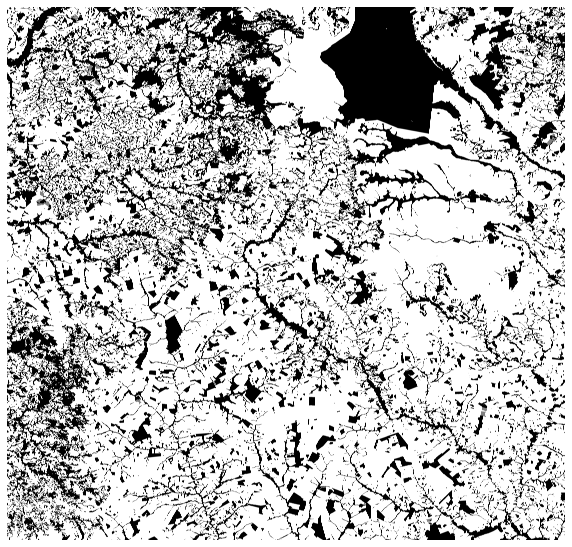

In [79]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [80]:
manager.squeezeLabel()

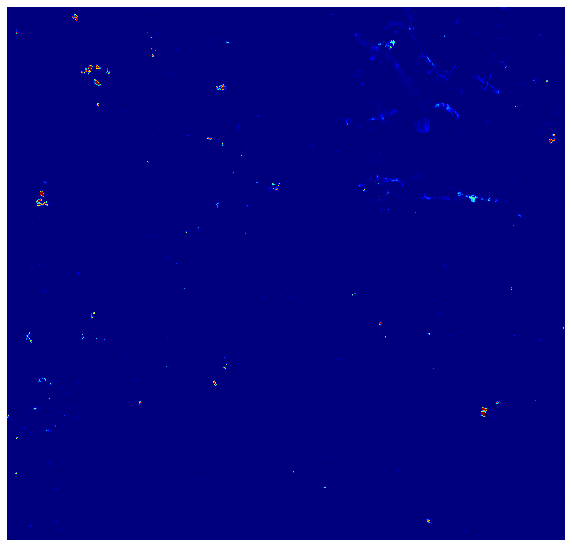

In [81]:
manager.setMeanProbNotConsideredAreas()
manager.logger.plotFigure(manager.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [82]:
print(manager.label_mask.shape)

(18605, 19480)


In [83]:
# manager.getLabelTest()

In [84]:
# manager.getMAP()

In [85]:
manager.prob_rec.shape

(18640, 19488, 10)

In [86]:
manager.preprocessProbRec()
print(manager.prob_rec.shape)

(10, 18640, 19488, 1)


In [87]:
manager.prob_rec.shape

(10, 18640, 19488, 1)

In [88]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:119 in getStats()
    np.min(value): 1.3383891e-28
    np.mean(value): 0.0019969274
    np.max(value): 1.0


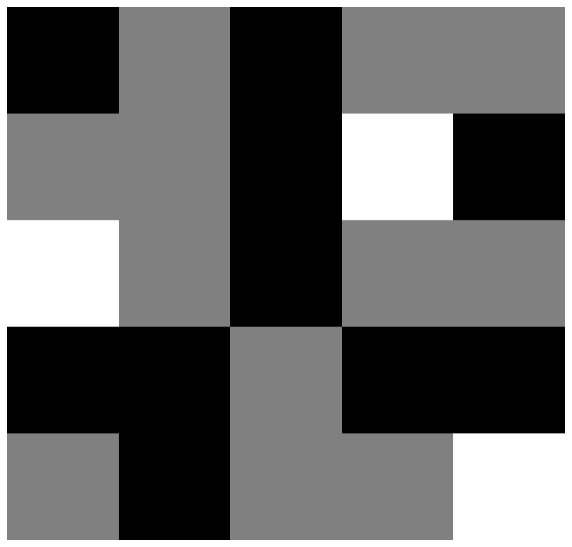

In [89]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [90]:
manager.getLabelCurrentDeforestation()

In [91]:
manager.applyProbabilityThreshold()

(18605, 19480)
(array([0., 1.], dtype=float32), array([362023260,    402140], dtype=int64))


ic| base.py:413 in applyProbabilityThreshold()
    self.predicted_unpad.shape: (18605, 19480)
    self.predicted.shape: (18605, 19480)


In [92]:
manager.getTestValues()

ic| base.py:436 in getTestValues()- predicted_test.shape: (144970160,)
ic| base.py:445 in getTestValues()- predicted_test.shape: (36877090,)


In [93]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([362023260,    402140], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([362046532,    378868], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([362402128,     23272], dtype=int64))


In [94]:
manager.calculateMetrics()

ic| base.py:489 in calculateMetrics()
    self.f1: 85.87
    self.precision: 96.87
    self.recall: 77.11


In [95]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| base.py:418 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (43491048,)
ic| base.py:424 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (10774865,)
ic| base.py:500 in calculateMetricsValidation()
    f1_val: 61.18
    precision_val: 100.0
    recall_val: 44.07
    mAP_val: 50.71


In [96]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [97]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/MS/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:501 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| dataset.py:504 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MS/deforestation_before_2000_MS.tif


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([126708038, 235735967], dtype=int64))
ic| dataset.py:514 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))
ic| dataset.py:493 in loadLabel()
    label_per_date.shape: (18605, 19481, 1)


In [98]:
manager.getErrorMask()

(array([0., 1.], dtype=float32), array([362268633,    156767], dtype=int64))


In [99]:
manager.getErrorMaskToShowRGB()

[0. 1.]


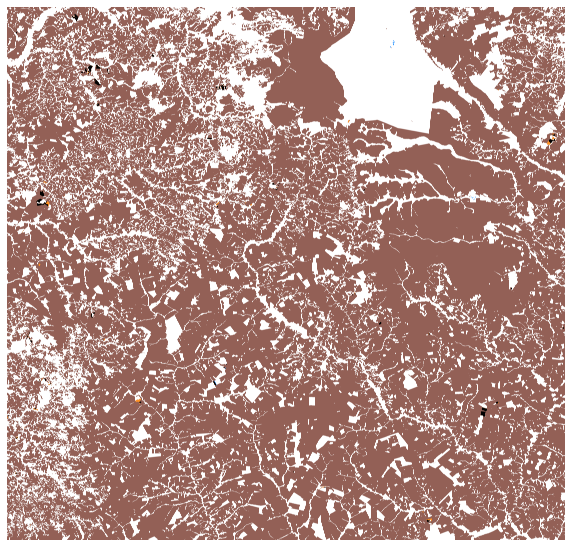

In [100]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [101]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [102]:
manager.setUncertainty()

K = 1, pred_mean shape (18640, 19488, 1)


In [103]:
# manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [104]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:119 in getStats()
    np.min(value): -0.0
    np.mean(value): 0.0027508114
    np.max(value): 0.36787948


In [105]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:119 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.0024154715
    np.max(value): 0.36787948


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (18605, 19480)


(18605, 19480)

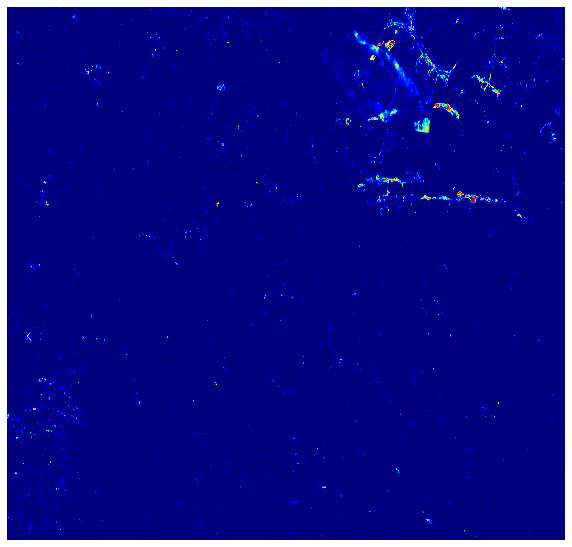

In [106]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



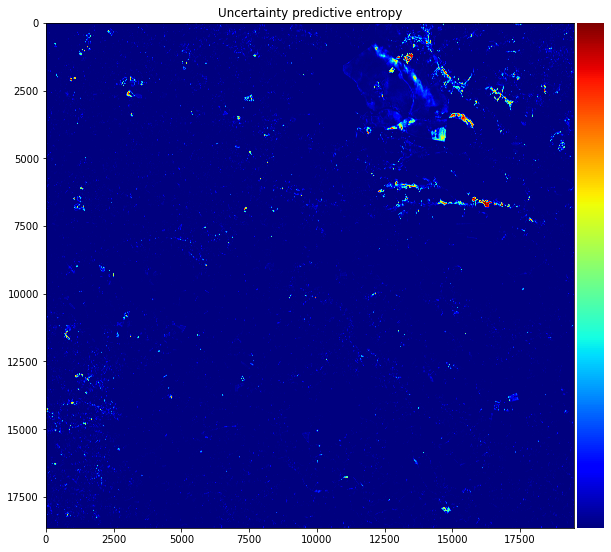

In [107]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [108]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:540 in getTestValues2()
    self.label_mask.shape: (18605, 19480)
ic| base.py:541 in getTestValues2()
    self.mask_amazon_ts.shape: (18605, 19480)
ic| base.py:545 in getTestValues2()
    self.label_mask_test.shape: (144970160,)
ic| base.py:553 in getTestValues2()
    self.error_mask_test.shape: (36865232,)


In [109]:
manager.dataset.previewLims1 = np.array([11500, 12500, 9000, 10000])

ic| Logger.py:163 in plotCropSample()
    manager.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    manager.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| Logger.py:165 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([0], dtype=uint8)
ic| Logger.py:167 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


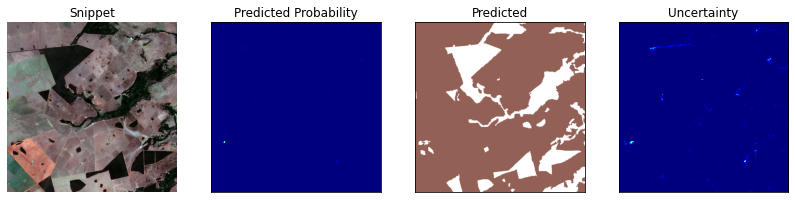

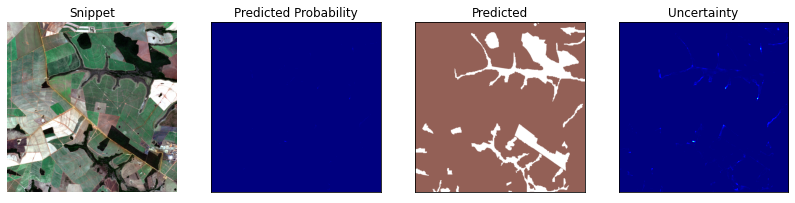

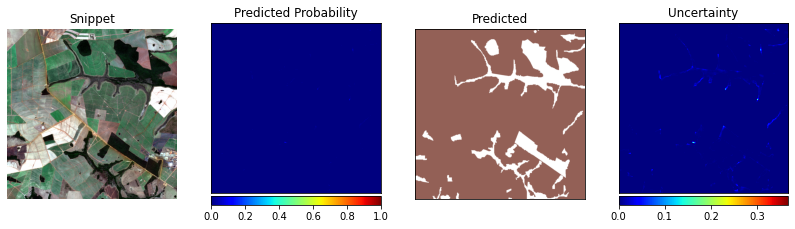

In [110]:
manager.logger.plotCropSample(manager)

In [111]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [112]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [113]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


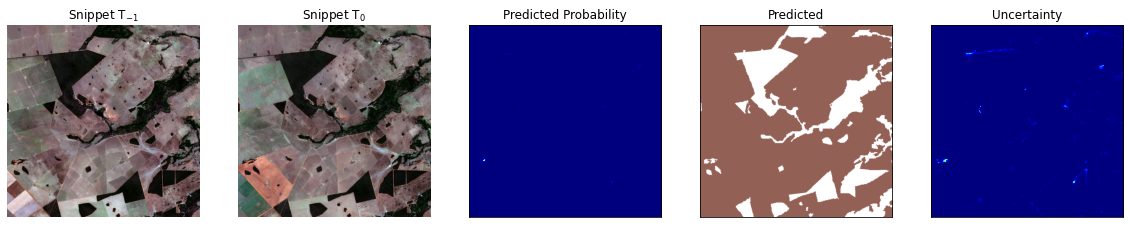

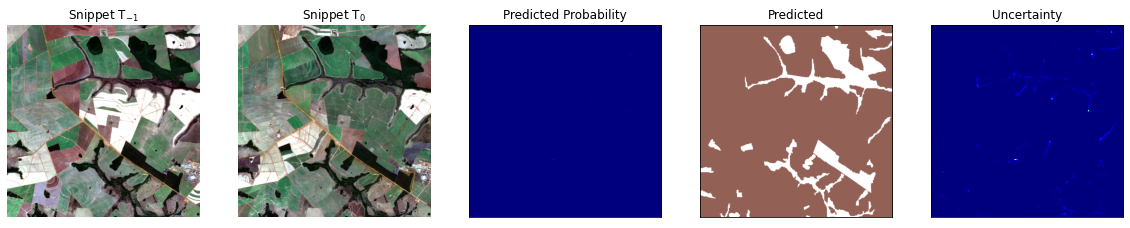

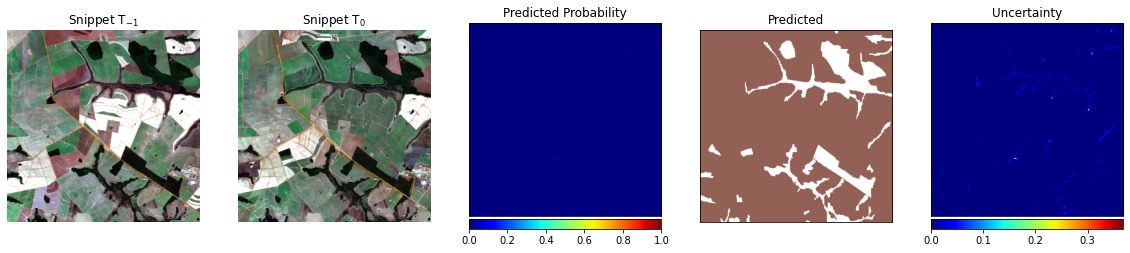

In [114]:
manager.logger.plotCropSampleT0T1(manager)

In [115]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:119 in getStats()
    np.min(value): -0.0
    np.mean(value): 0.006217945
    np.max(value): 0.36787948


In [116]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [117]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [118]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [119]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [120]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [121]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)



Get precision-recall threshold

In [122]:

manager.getUncertaintyAAValues()

ic| 810240186.py:62 in getUncertaintyAAValues()
    self.uncertainty.shape: (36865232,)
    self.label_mask_current_deforestation_test.shape: (36865232,)


[0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (7733867,)
    predicted_test_classified_incorrect.shape: (7733867,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 7733867
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 7733867
    len(label_mask_current_deforestation_test): 36865232


[0.99637571 0.83144424 0.31732942 0.20978756 0.95030925 0.73384122
 0.00700705]
threshold 0.005


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (5225638,)
    predicted_test_classified_incorrect.shape: (5225638,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5225638
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5225638
    len(label_mask_current_deforestation_test): 36865232


[0.99412024 0.83726782 0.3598436  0.14174977 0.9475744  0.72121481
 0.00999251]
threshold 0.0075


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4050683,)
    predicted_test_classified_incorrect.shape: (4050683,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4050683
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4050683
    len(label_mask_current_deforestation_test): 36865232


[0.99330914 0.84027324 0.38800729 0.10987814 0.94506632 0.71174095
 0.01256754]
threshold 0.01


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3354745,)
    predicted_test_classified_incorrect.shape: (3354745,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3354745
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3354745
    len(label_mask_current_deforestation_test): 36865232


[0.99287118 0.84282517 0.40987272 0.09100024 0.94274367 0.70318362
 0.01489677]
threshold 0.015


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2533371,)
    predicted_test_classified_incorrect.shape: (2533371,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2533371
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2533371
    len(label_mask_current_deforestation_test): 36865232


[0.99213897 0.84618433 0.44404351 0.06871979 0.93868516 0.68817604
 0.01912481]
threshold 0.025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1716364,)
    predicted_test_classified_incorrect.shape: (1716364,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1716364
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1716364
    len(label_mask_current_deforestation_test): 36865232


[0.99126044 0.85092446 0.49262371 0.0465578  0.93131311 0.66133228
 0.02700981]
threshold 0.05


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (950956,)
    predicted_test_classified_incorrect.shape: (950956,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 950956
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 950956
    len(label_mask_current_deforestation_test): 36865232


[0.98891963 0.85201461 0.55376579 0.02579547 0.92086363 0.62084229
 0.04454693]
threshold 0.08


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (620214,)
    predicted_test_classified_incorrect.shape: (620214,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 620214
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 620214
    len(label_mask_current_deforestation_test): 36865232


[0.98789089 0.84743581 0.59329202 0.01682382 0.90988754 0.59287085
 0.06170938]
threshold 0.1


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (503790,)
    predicted_test_classified_incorrect.shape: (503790,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 503790
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 503790
    len(label_mask_current_deforestation_test): 36865232


[0.9873745  0.84523679 0.61291474 0.01366572 0.90272997 0.57548395
 0.07165131]
threshold 0.15


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (345566,)
    predicted_test_classified_incorrect.shape: (345566,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 345566
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 345566
    len(label_mask_current_deforestation_test): 36865232


[0.98652488 0.8427118  0.65117577 0.00937376 0.88236794 0.52760409
 0.09286917]
threshold 0.2


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (257533,)
    predicted_test_classified_incorrect.shape: (257533,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 257533
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 257533
    len(label_mask_current_deforestation_test): 36865232


[0.98568835 0.83881487 0.68302067 0.0069858  0.85476871 0.47418909
 0.10893589]
threshold 0.225


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (224724,)
    predicted_test_classified_incorrect.shape: (224724,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 224724
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 224724
    len(label_mask_current_deforestation_test): 36865232


[0.98523291 0.83693943 0.69749594 0.00609582 0.83610302 0.44172596
 0.11611424]
threshold 0.25


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (195835,)
    predicted_test_classified_incorrect.shape: (195835,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 195835
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 195835
    len(label_mask_current_deforestation_test): 36865232


[0.98467633 0.83507121 0.71343399 0.00531219 0.8071231  0.39584027
 0.12250509]
threshold 0.27


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (174283,)
    predicted_test_classified_incorrect.shape: (174283,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 174283
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 174283
    len(label_mask_current_deforestation_test): 36865232


[0.98428172 0.83303736 0.72519862 0.00472757 0.77531182 0.35452257
 0.12727049]
threshold 0.3


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (142675,)
    predicted_test_classified_incorrect.shape: (142675,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 142675
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 142675
    len(label_mask_current_deforestation_test): 36865232


[0.98363388 0.82928954 0.74249199 0.00387018 0.69540666 0.27325716
 0.13428045]
threshold 0.34


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (96506,)
    predicted_test_classified_incorrect.shape: (96506,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 96506
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 96506
    len(label_mask_current_deforestation_test): 36865232


[0.9734507  0.82162998 0.76663478 0.00261781 0.52878289 0.06659762
 0.12733142]
threshold 0.36


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (54156,)
    predicted_test_classified_incorrect.shape: (54156,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 54156
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 54156
    len(label_mask_current_deforestation_test): 36865232


[0.96874129 0.79970234 0.77109244 0.00146903        nan 0.
 0.08817524]
threshold 0.3648794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (34511,)
    predicted_test_classified_incorrect.shape: (34511,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 34511
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 34511
    len(label_mask_current_deforestation_test): 36865232


[9.68741290e-01 7.88458130e-01 7.71092439e-01 9.36139504e-04
            nan 0.00000000e+00 6.26794117e-02]
threshold 0.3663794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (24528,)
    predicted_test_classified_incorrect.shape: (24528,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 24528
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 24528
    len(label_mask_current_deforestation_test): 36865232


[9.68741290e-01 7.83200484e-01 7.71092439e-01 6.65342347e-04
            nan 0.00000000e+00 4.78109858e-02]


In [123]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:682 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (36865232,)
    self.label_mask_current_deforestation_test.shape: (36865232,)


threshold 0.0025
(36865232,) (36865232,)
cm_audited [[36576407      333]
 [   18559   269933]]
[0.99876788 0.93566893]
threshold 0.005
(36865232,) (36865232,)
cm_audited [[36576126      614]
 [   20177   268315]]
[0.99771687 0.93006045]
threshold 0.0075
(36865232,) (36865232,)
cm_audited [[36575986      754]
 [   21278   267214]]
[0.99718623 0.92624406]
threshold 0.01
(36865232,) (36865232,)
cm_audited [[36575891      849]
 [   22051   266441]]
[0.99682367 0.9235646 ]
threshold 0.015
(36865232,) (36865232,)
cm_audited [[36575725     1015]
 [   23286   265206]]
[0.99618738 0.91928372]
threshold 0.025
(36865232,) (36865232,)
cm_audited [[36575487     1253]
 [   24898   263594]]
[0.99526897 0.91369605]
threshold 0.05
(36865232,) (36865232,)
cm_audited [[36574950     1790]
 [   27748   260744]]
[0.99318184 0.90381709]
threshold 0.08
(36865232,) (36865232,)
cm_audited [[36574642     2098]
 [   30814   257678]]
[0.99192381 0.89318941]
threshold 0.1
(36865232,) (36865232,)
cm_audited [[365744

ic| base.py:688 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.99876788, 0.93566893],
                                  [0.99771687, 0.93006045],
                                  [0.99718623, 0.92624406],
                                  [0.99682367, 0.9235646 ],
                                  [0.99618738, 0.91928372],
                                  [0.99526897, 0.91369605],
                                  [0.99318184, 0.90381709],
                                  [0.99192381, 0.89318941],
                                  [0.99124922, 0.88777505],
                                  [0.98997637, 0.8784611 ],
                                  [0.98871351, 0.86875199],
                                  [0.98804617, 0.86410715],
                                  [0.98724133, 0.85909488],
                                  [0.98663071, 0.85465108],
                                  [0.98562683, 0.84715694],
                                  [0.9755304 , 0.

cm_audited [[36569562     7178]
 [   61578   226914]]
[0.96933684 0.78655214]


In [124]:
manager.setPlotLimsForUncertaintyAA()

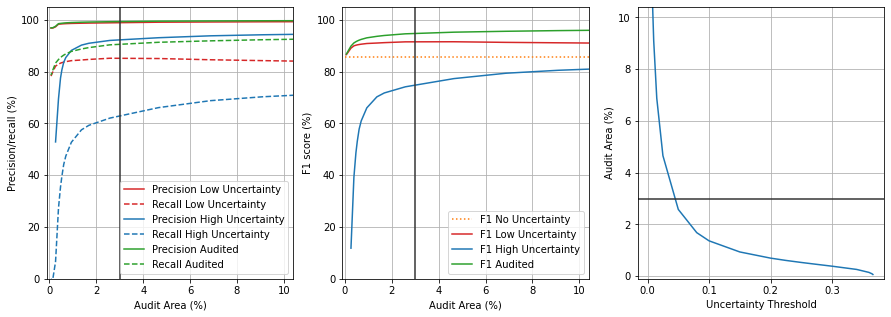

In [125]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [126]:
from scipy import optimize  


In [127]:
manager.getOptimalUncertaintyThreshold()

ic| base.py:791 in getOptimalUncertaintyThreshold()
    bounds: (0.0015, 0.3663794801235199)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.1408715596097929
threshold 0.1408715596097929


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (366907,)
    predicted_test_classified_incorrect.shape: (366907,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 366907
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 366907
    len(label_mask_current_deforestation_test): 36865232


[0.98670423 0.8430761  0.64464526 0.00995266 0.88646691 0.53723804
 0.08933517]
0.22700792051372695
threshold 0.22700792051372695


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (222282,)
    predicted_test_classified_incorrect.shape: (222282,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 222282
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 222282
    len(label_mask_current_deforestation_test): 36865232


[0.98514297 0.83680798 0.69872648 0.00602958 0.83457925 0.43855558
 0.11663322]
0.08763636090393405
threshold 0.08763636090393405


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (569583,)
    predicted_test_classified_incorrect.shape: (569583,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 569583
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 569583
    len(label_mask_current_deforestation_test): 36865232


[0.98767147 0.84635945 0.60148635 0.01545041 0.90708539 0.58621268
 0.06556165]
0.05473519870585886
threshold 0.05473519870585886


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (877026,)
    predicted_test_classified_incorrect.shape: (877026,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 877026
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 877026
    len(label_mask_current_deforestation_test): 36865232


[0.98866966 0.85167072 0.56137432 0.02379006 0.91914803 0.6152704
 0.04757422]
0.034401162198075194
threshold 0.034401162198075194


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1317020,)
    predicted_test_classified_incorrect.shape: (1317020,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1317020
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1317020
    len(label_mask_current_deforestation_test): 36865232


[0.99030721 0.85275178 0.5223715  0.03572526 0.92637205 0.64197906
 0.03400403]
0.04180534339288834
threshold 0.04180534339288834


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1112990,)
    predicted_test_classified_incorrect.shape: (1112990,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1112990
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1112990
    len(label_mask_current_deforestation_test): 36865232


[0.98966579 0.85281248 0.53909294 0.03019078 0.92337619 0.63066544
 0.03920431]
0.044368394785325
threshold 0.044368394785325


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1056706,)
    predicted_test_classified_incorrect.shape: (1056706,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1056706
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1056706
    len(label_mask_current_deforestation_test): 36865232


[0.98941019 0.85257326 0.54408095 0.02866403 0.92255138 0.62738655
 0.04089623]
0.04122239137349815
threshold 0.04122239137349815


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1126637,)
    predicted_test_classified_incorrect.shape: (1126637,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1126637
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1126637
    len(label_mask_current_deforestation_test): 36865232


[0.98973767 0.85280443 0.5378936  0.03056096 0.92355    0.63152164
 0.03880678]
0.042437199024229426
threshold 0.042437199024229426


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1098641,)
    predicted_test_classified_incorrect.shape: (1098641,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1098641
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1098641
    len(label_mask_current_deforestation_test): 36865232


[0.98959941 0.8527368  0.54023335 0.02980155 0.92320594 0.62995157
 0.03962317]
0.04204669076807761
threshold 0.04204669076807761


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1107486,)
    predicted_test_classified_incorrect.shape: (1107486,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1107486
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1107486
    len(label_mask_current_deforestation_test): 36865232


[0.98962439 0.85280067 0.53956436 0.03004148 0.92333425 0.63034616
 0.03936316]
0.04211751139909067
threshold 0.04211751139909067


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1105813,)
    predicted_test_classified_incorrect.shape: (1105813,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105813
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105813
    len(label_mask_current_deforestation_test): 36865232


[0.98960829 0.85278315 0.53970994 0.02999609 0.92332803 0.63026503
 0.03940839]
0.04223962120611094
threshold 0.04223962120611094


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1102994,)
    predicted_test_classified_incorrect.shape: (1102994,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1102994
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1102994
    len(label_mask_current_deforestation_test): 36865232


[0.9896057  0.85274424 0.53990405 0.02991963 0.92328138 0.63017659
 0.03948912]
0.042150845357127646
threshold 0.042150845357127646


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1105054,)
    predicted_test_classified_incorrect.shape: (1105054,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105054
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105054
    len(label_mask_current_deforestation_test): 36865232


[0.98960876 0.85274209 0.5397342  0.02997551 0.92332061 0.63030011
 0.03942561]
0.04208417744105369
threshold 0.04208417744105369


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1106584,)
    predicted_test_classified_incorrect.shape: (1106584,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1106584
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1106584
    len(label_mask_current_deforestation_test): 36865232
ic| base.py:795 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.04211751139909067


[0.98961326 0.85279505 0.53964061 0.03001701 0.92333647 0.63029914
 0.03938803]


In [128]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.04211751139909067
threshold 0.04211751139909067


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1105813,)
    predicted_test_classified_incorrect.shape: (1105813,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105813
    len(label_mask_current_deforestation_test): 36865232
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105813
    len(label_mask_current_deforestation_test): 36865232


[0.98960829 0.85278315 0.53970994 0.02999609 0.92332803 0.63026503
 0.03940839]
threshold 0.04211751139909067
(36865232,) (36865232,)


ic| base.py:826 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.02999609]),
                     'UEO': array([0.03940839]),
                     'f1': 85.87,
                     'f1_H': array([0.74915547]),
                     'f1_L': array([0.91611506]),
                     'precision_H': array([0.92332803]),
                     'precision_L': array([0.98960829]),
                     'recall_H': array([0.63026503]),
                     'recall_L': array([0.85278315]),
                     'recall_Ltotal': array([0.53970994])}
ic| base.py:827 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.94831986]),
                             'precision': array([0.99378913]),
                             'recall': array([0.90682931])}


cm_audited [[36575105     1635]
 [   26879   261613]]
[0.99378913 0.90682931]


{'metrics': {'precision_L': array([0.98960829]),
  'recall_L': array([0.85278315]),
  'recall_Ltotal': array([0.53970994]),
  'AA': array([0.02999609]),
  'precision_H': array([0.92332803]),
  'recall_H': array([0.63026503]),
  'UEO': array([0.03940839]),
  'f1_L': array([0.91611506]),
  'f1_H': array([0.74915547]),
  'f1': 85.87},
 'metrics_audited': {'precision': array([0.99378913]),
  'recall': array([0.90682931]),
  'f1': array([0.94831986])},
 'exp': 5}